# Kmeans의 inertia 란 ?

이니셔라고 부름.
클러스터 중심과 클러스터에 속한 샘플 간의 거리를 제곱하여 더한 것

보통 클러스터 개수가 많을수록 클러스터 내 샘플의 수가 적어져 inertia 감소함

엘보우 기법을 이용할 때 y축의 값 의미

In [1]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

pd.options.display.float_format='{:.8f}'.format

In [2]:
df=pd.read_csv('wine_test.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    178 non-null    int64  
 1   alcohol                       176 non-null    float64
 2   malic_acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          173 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  od280/od315_of_diluted_wines  178 non-null    float64
 13  proli

In [4]:
df.head()

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,0,14.23000000,1.71000000,2.43000000,15.60000000,127,2.80000000,3.06000000,0.28000000,2.29000000,5.64000000,1.04000000,3.92000000,1065,0
1,1,NaN,1.78000000,2.14000000,11.20000000,100,2.65000000,2.76000000,0.26000000,1.28000000,4.38000000,1.05000000,3.40000000,1050,0
2,2,13.16000000,2.36000000,2.67000000,18.60000000,101,2.80000000,3.24000000,0.30000000,2.81000000,5.68000000,1.03000000,3.17000000,1185,0
3,3,14.37000000,1.95000000,2.50000000,16.80000000,113,3.85000000,3.49000000,0.24000000,2.18000000,7.80000000,0.86000000,3.45000000,1480,0
4,4,13.24000000,2.59000000,2.87000000,21.00000000,118,2.80000000,2.69000000,0.39000000,1.82000000,4.32000000,1.04000000,2.93000000,735,0


In [5]:
# 결측치 제거
df.dropna(inplace=True)

In [6]:
df.columns

Index(['Unnamed: 0', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class'],
      dtype='object')

In [7]:
df=df[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class']]

In [8]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23000000,1.71000000,2.43000000,15.60000000,127,2.80000000,3.06000000,0.28000000,2.29000000,5.64000000,1.04000000,3.92000000,1065,0
2,13.16000000,2.36000000,2.67000000,18.60000000,101,2.80000000,3.24000000,0.30000000,2.81000000,5.68000000,1.03000000,3.17000000,1185,0
3,14.37000000,1.95000000,2.50000000,16.80000000,113,3.85000000,3.49000000,0.24000000,2.18000000,7.80000000,0.86000000,3.45000000,1480,0
4,13.24000000,2.59000000,2.87000000,21.00000000,118,2.80000000,2.69000000,0.39000000,1.82000000,4.32000000,1.04000000,2.93000000,735,0
5,14.20000000,1.76000000,2.45000000,15.20000000,112,3.27000000,3.39000000,0.34000000,1.97000000,6.75000000,1.05000000,2.85000000,1450,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71000000,5.65000000,2.45000000,20.50000000,95,1.68000000,0.61000000,0.52000000,1.06000000,7.70000000,0.64000000,1.74000000,740,2
174,13.40000000,3.91000000,2.48000000,23.00000000,102,1.80000000,0.75000000,0.43000000,1.41000000,7.30000000,0.70000000,1.56000000,750,2
175,13.27000000,4.28000000,2.26000000,20.00000000,120,1.59000000,0.69000000,0.43000000,1.35000000,10.20000000,0.59000000,1.56000000,835,2
176,13.17000000,2.59000000,2.37000000,20.00000000,120,1.65000000,0.68000000,0.53000000,1.46000000,9.30000000,0.60000000,1.62000000,840,2


In [11]:
# 비지도학습이지만 실습 후 class열과 비교할 예정
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
df_scaled = sc.fit_transform(df)
pd.DataFrame(df_scaled)
df_sc=pd.DataFrame(df_scaled, columns=df.columns)

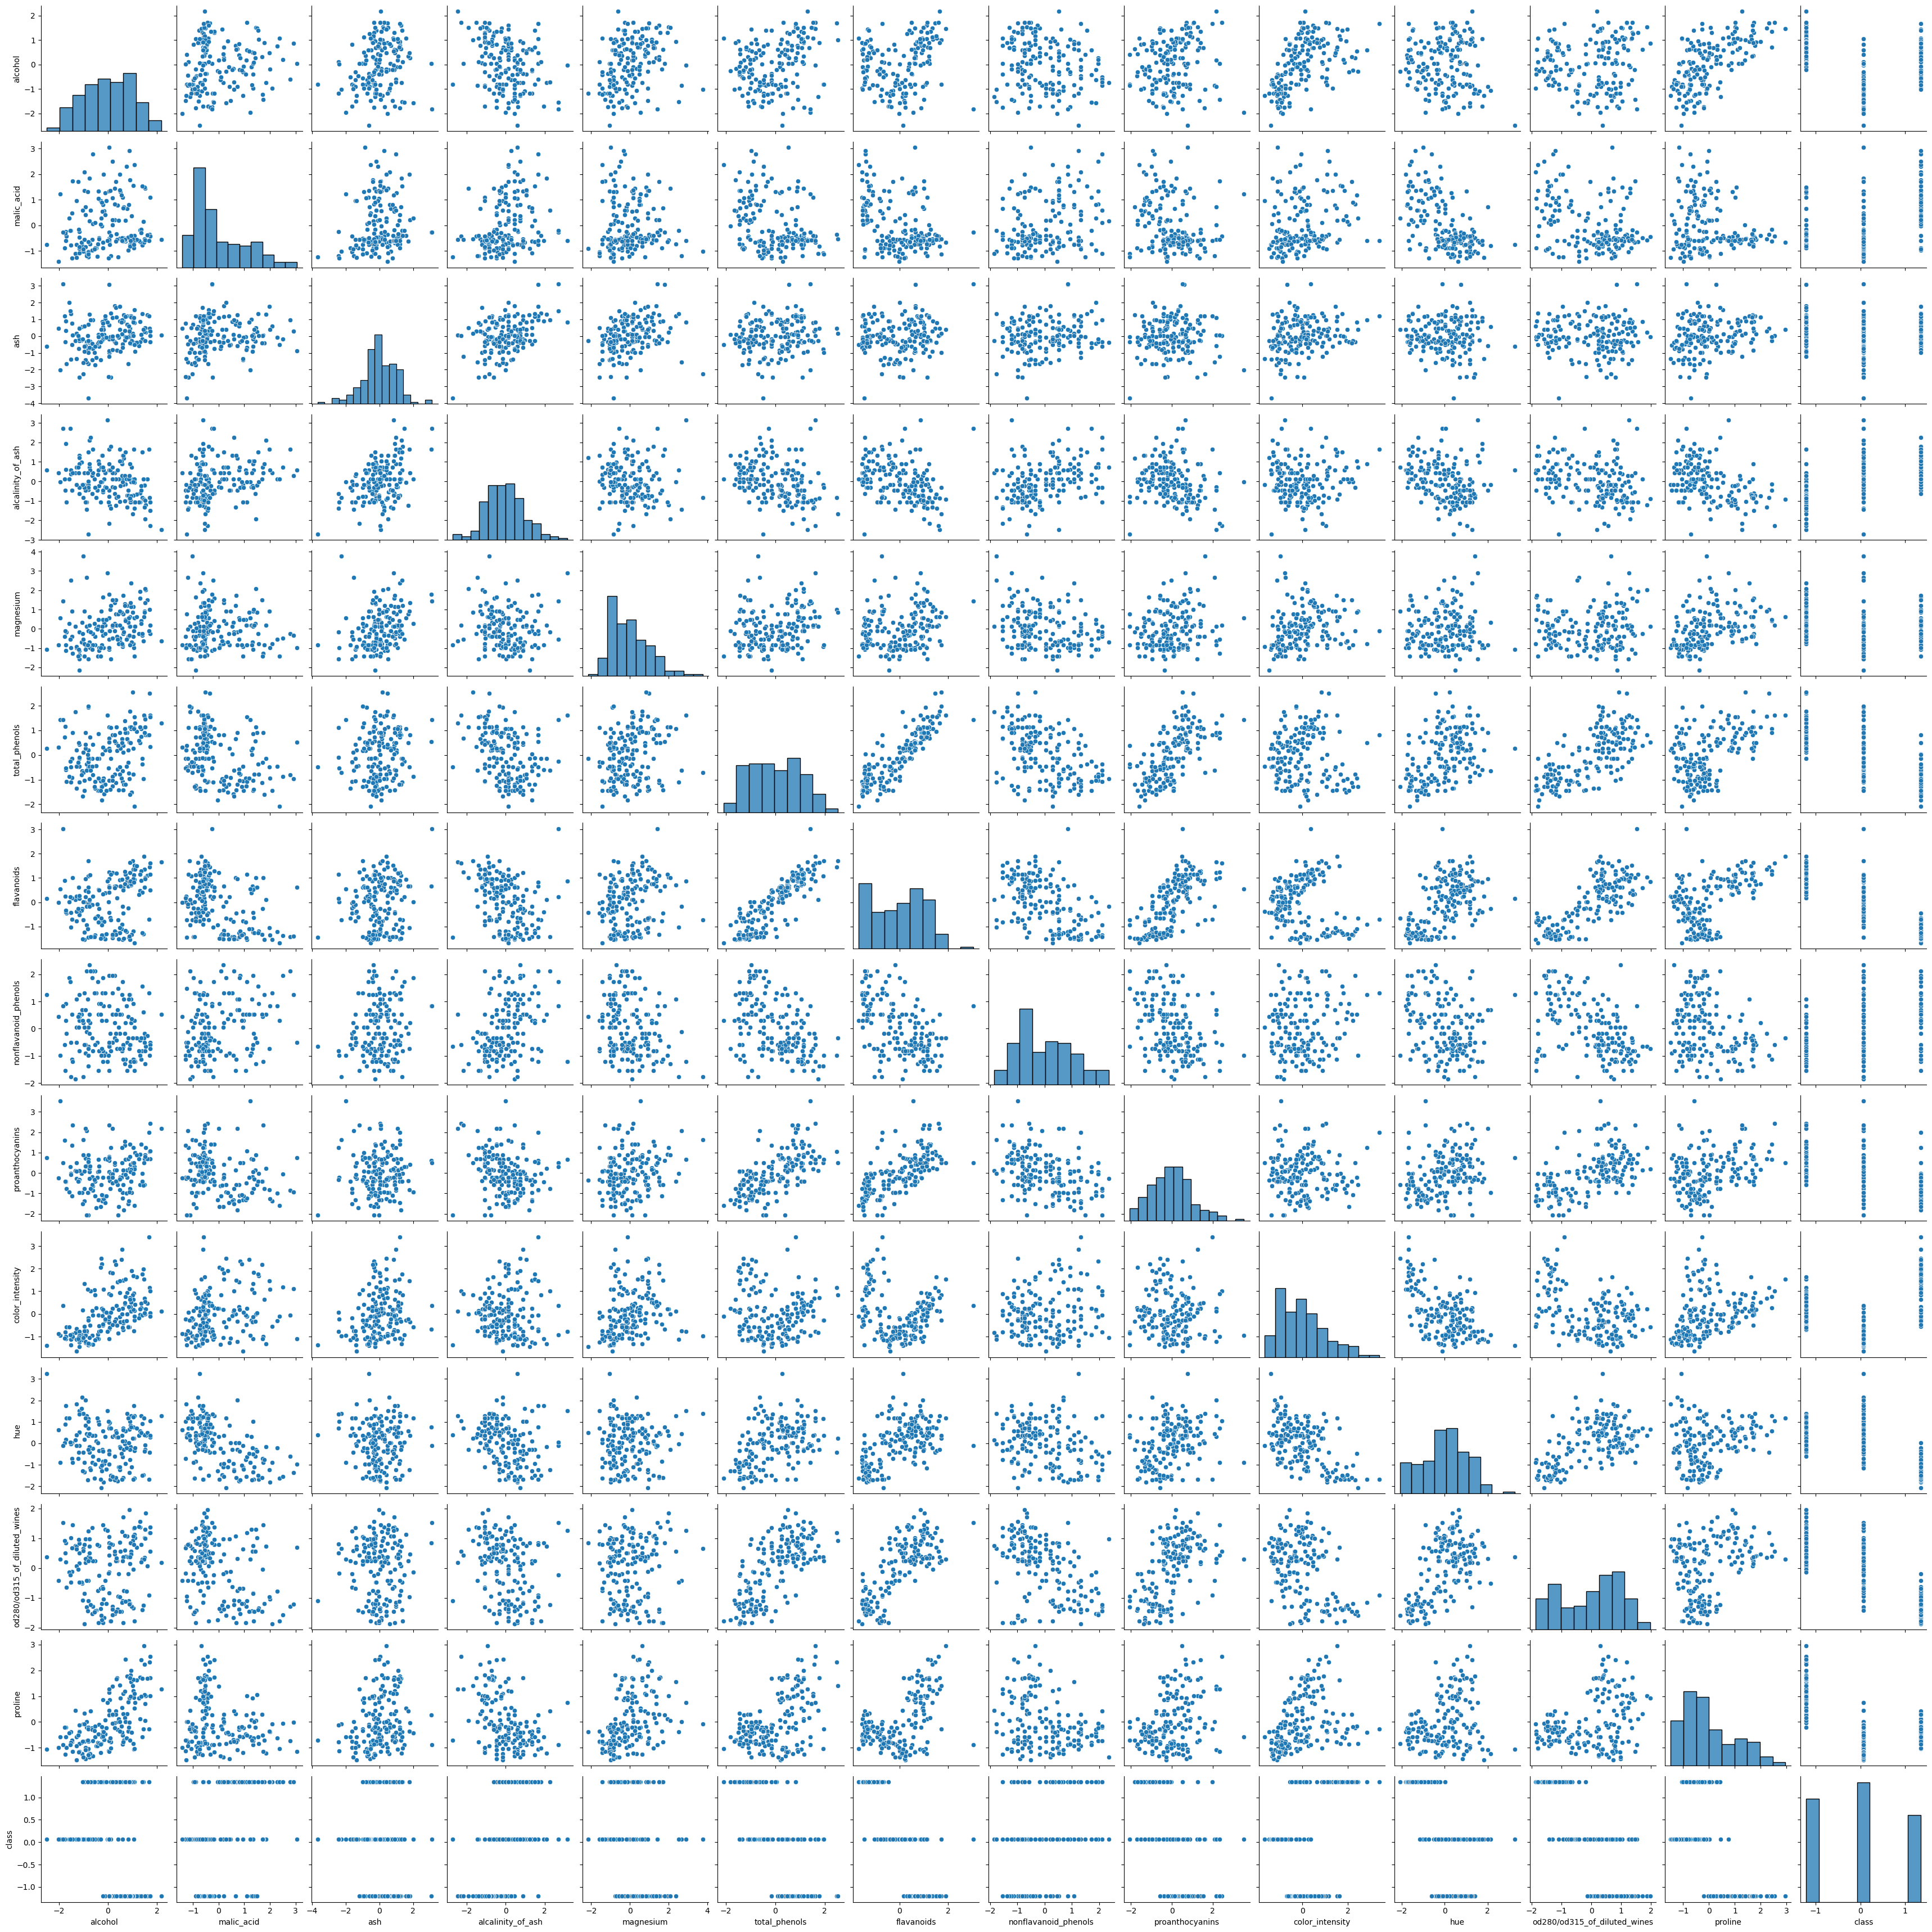

In [13]:
sns.pairplot(df_sc)

<AxesSubplot:>

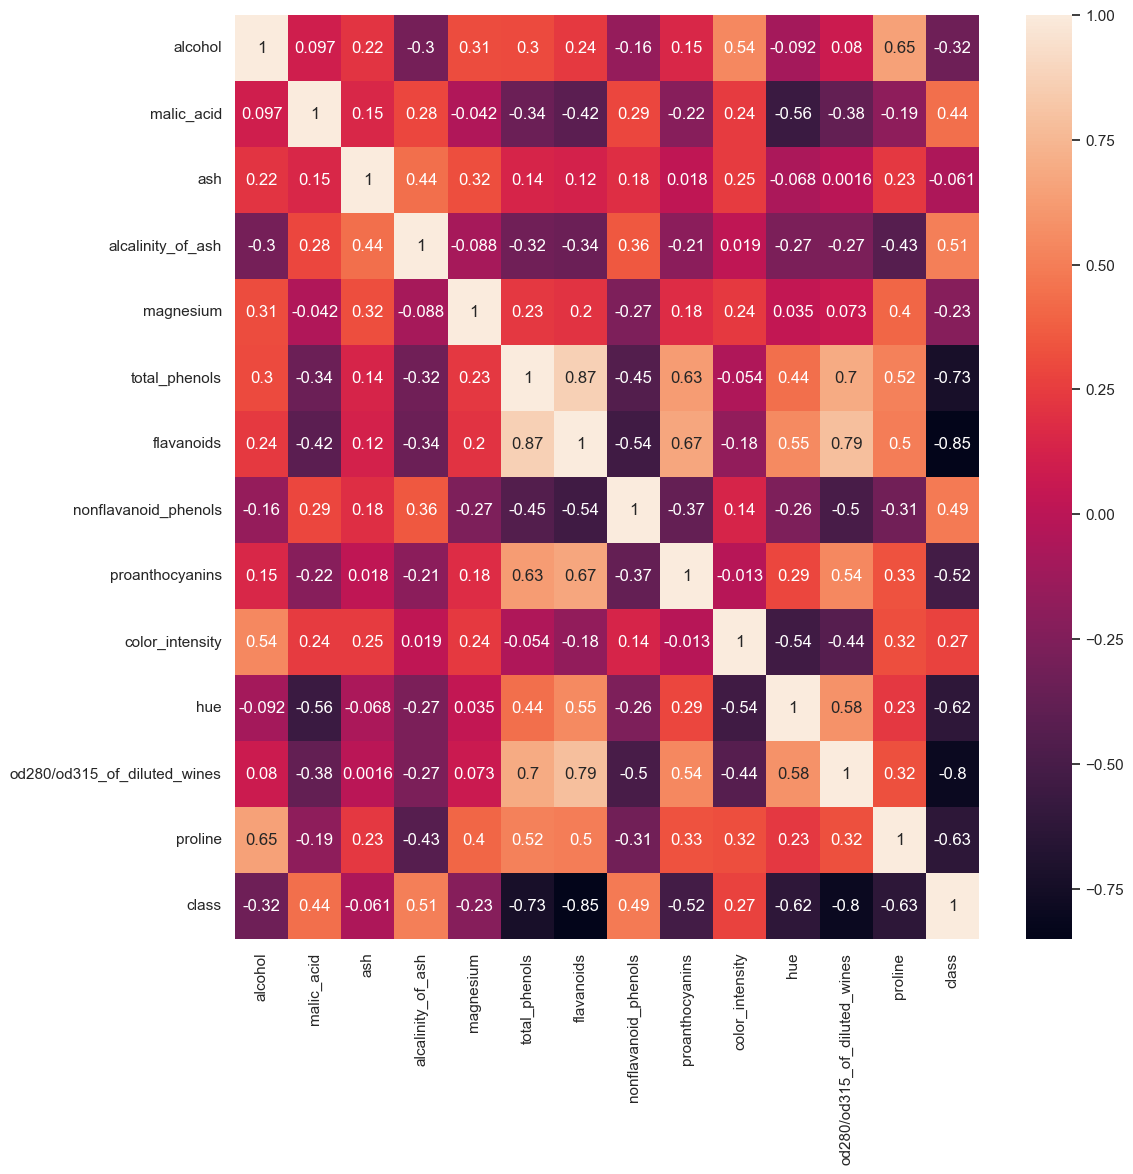

In [20]:
#상관관계가 큰 컬럼들 골라보기
sns.set(style="white")

cor = df_sc.corr()

f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(cor, annot=True)


In [ ]:
#0.5 이상의 상관계수인 컬럼을 여러개 갖는 컬럼들 고르기
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class']]

'od280/od315_of_diluted_wines', 'flavanoids', 'hue', 'proanthocyanins', 'total_phenols', 'proline'

In [24]:
df=pd.read_csv('wine_test.csv')
df.dropna(inplace=True)
df_sp=df[['od280/od315_of_diluted_wines', 'flavanoids', 'hue', 'proanthocyanins', 'total_phenols', 'proline']]

In [25]:
sc = StandardScaler()
df_scaled = sc.fit_transform(df_sp)
pd.DataFrame(df_scaled)
df_sc_sp = pd.DataFrame(df_scaled, columns = df_sp.columns)

In [27]:
df_sc_sp.head()

,od280/od315_of_diluted_wines,flavanoids,hue,proanthocyanins,total_phenols,proline
0,1.85100599,1.03169609,0.35811132,1.25092179,0.81544853,1.00875071
1,0.79757125,1.21048004,0.31483426,2.17042222,0.81544853,1.38822501
2,1.19085355,1.45879109,-0.42087570,1.05641209,2.49296666,2.32109935
3,0.46047214,0.66419574,0.35811132,0.41983488,0.81544853,-0.03480364
4,0.34810576,1.35946667,0.40138837,0.68507538,1.56633760,2.22623077


In [26]:
df_scaled

array([[ 1.85100599,  1.03169609,  0.35811132,  1.25092179,  0.81544853,
         1.00875071],
       [ 0.79757125,  1.21048004,  0.31483426,  2.17042222,  0.81544853,
         1.38822501],
       [ 1.19085355,  1.45879109, -0.4208757 ,  1.05641209,  2.49296666,
         2.32109935],
       ...,
       [-1.46380198, -1.32229262, -1.58935623, -0.41125204, -1.11769142,
         0.28142495],
       [-1.3795272 , -1.33222506, -1.54607917, -0.21674234, -1.02183324,
         0.29723638],
       [-1.4076188 , -1.25276553, -1.50280212, -0.41125204, -0.38277871,
        -0.58820367]])

1651.4259768670518
1224.2196297460978
1131.262121897408
1068.607879393746
997.7680550684911
960.4137306510793
918.5625108136869


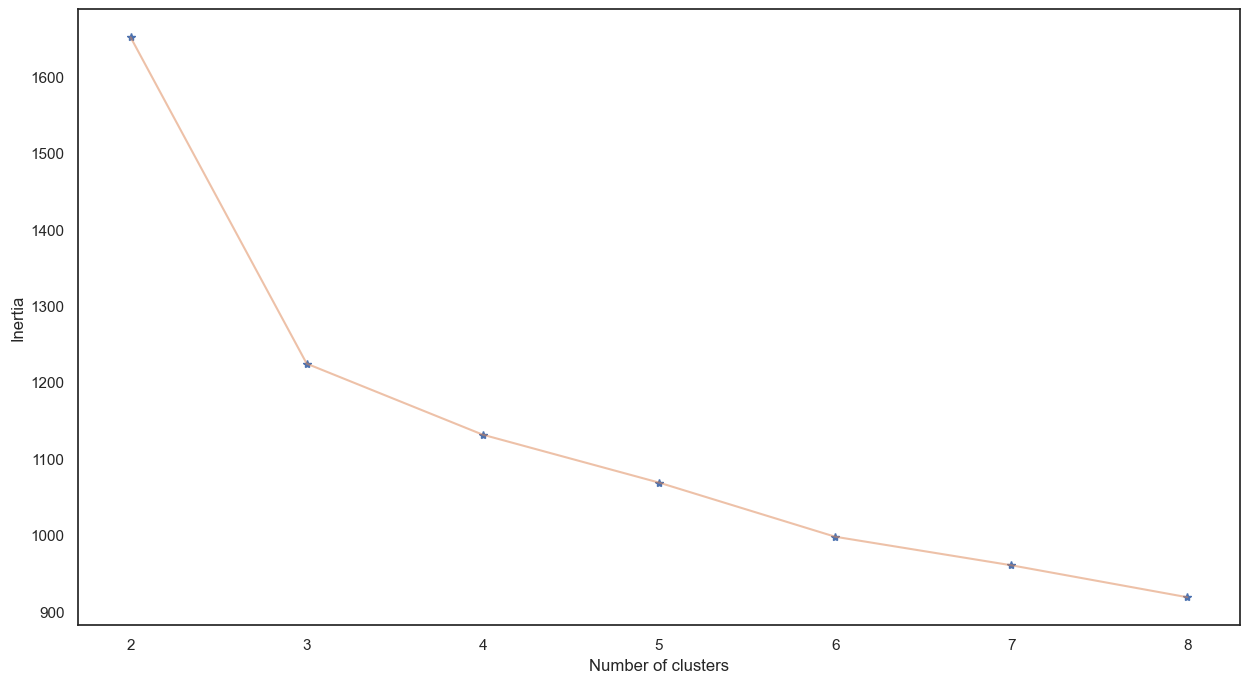

In [22]:
#클러스터링의 개수 정하기 by 엘보우 기법
def change_n_clusters(n_clusters, data):
    sum_of_squared_distance=[]
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters = n_cluster)
        kmeans.fit(data)
        sum_of_squared_distance.append(kmeans.inertia_)
        print(kmeans.inertia_)
        
    plt.figure(1, figsize=(15,8))
    plt.plot(n_clusters, sum_of_squared_distance, '*')
    plt.plot(n_clusters, sum_of_squared_distance, '-', alpha=0.5)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')

n_clusters = [2,3,4,5,6,7,8]
change_n_clusters(n_clusters, df_scaled)

#다른 방법으로도 확인

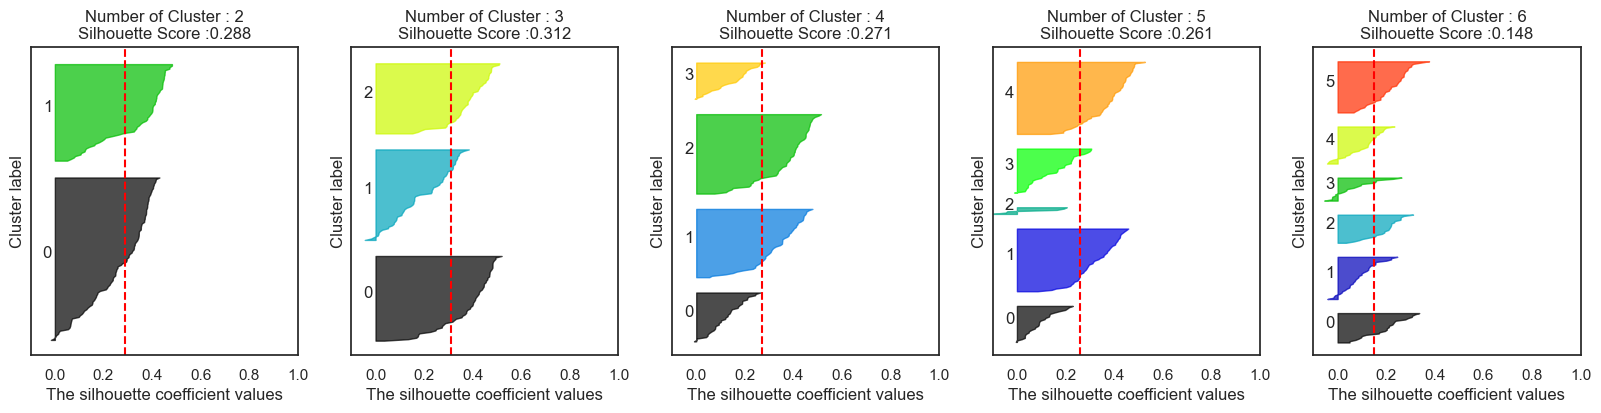

In [23]:
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


visualize_silhouette([2,3,4,5,6], df_scaled)

#실루엣 계수의 평균이 가장 큰 cluster 3 가 적절해보임.

In [1]:
#아까 선택한 6개의 변수를 2차원으로 축소시켜보자

kmeans = KMeans(n_clusters=3, random_state=111)
clusters = kmeans.fit(df_scaled)

NameError: name 'KMeans' is not defined

In [29]:
df_sc_sp['cluster'] = clusters.labels_

,od280/od315_of_diluted_wines,flavanoids,hue,proanthocyanins,total_phenols,proline,cluster
0,1.85100599,1.03169609,0.35811132,1.25092179,0.81544853,1.00875071,1
1,0.79757125,1.21048004,0.31483426,2.17042222,0.81544853,1.38822501,1
2,1.19085355,1.45879109,-0.42087570,1.05641209,2.49296666,2.32109935,1
3,0.46047214,0.66419574,0.35811132,0.41983488,0.81544853,-0.03480364,1
4,0.34810576,1.35946667,0.40138837,0.68507538,1.56633760,2.22623077,1
...,...,...,...,...,...,...,...
166,-1.21097765,-1.40175215,-1.37297095,-0.92405036,-0.97390415,-0.01899221,2
167,-1.46380198,-1.26269797,-1.11330861,-0.30515584,-0.78218779,0.01263065,2
168,-1.46380198,-1.32229262,-1.58935623,-0.41125204,-1.11769142,0.28142495,2
169,-1.37952720,-1.33222506,-1.54607917,-0.21674234,-1.02183324,0.29723638,2


In [31]:
from sklearn.decomposition import PCA

X = df_scaled.copy()

# PCA 적용
pca = PCA(n_components = 2)
pca.fit(X)

x_pca = pca.transform(X)
x_pca

array([[-2.60567431e+00, -2.54089062e-01],
       [-2.68319390e+00, -1.00883275e+00],
       [-3.36733559e+00, -2.03658485e+00],
       [-1.17740765e+00,  1.93788564e-01],
       [-2.61713672e+00, -1.49619706e+00],
       [-1.88491780e+00, -7.63112165e-01],
       [-1.51937340e+00, -4.57800289e-01],
       [-2.19216124e+00, -3.49179256e-01],
       [-3.16730188e+00, -9.97199483e-01],
       [-1.07412075e+00, -4.42670734e-01],
       [-1.75435740e+00, -7.17692208e-01],
       [-3.13494754e+00, -5.77258778e-01],
       [-3.83633963e+00, -1.54597740e+00],
       [-1.93949979e+00, -2.93946331e-01],
       [-1.88864320e+00, -1.05165902e+00],
       [-1.84944987e+00, -5.54760806e-01],
       [-3.28654430e+00, -1.47766661e+00],
       [-1.41561581e+00, -1.35045754e-02],
       [-2.34781797e+00,  4.20770074e-01],
       [-1.24485067e+00,  3.72695176e-01],
       [-2.08966958e+00,  2.67413769e-01],
       [-1.31169088e+00,  2.06124359e-01],
       [-1.59995902e+00,  6.55737611e-01],
       [-1.

In [32]:
pca_df = pd.DataFrame(x_pca)

In [33]:
pca_df['cluster'] =df_sc_sp['cluster']

In [40]:
df_sp

,od280/od315_of_diluted_wines,flavanoids,hue,proanthocyanins,total_phenols,proline
0,3.92000000,3.06000000,1.04000000,2.29000000,2.80000000,1065
2,3.17000000,3.24000000,1.03000000,2.81000000,2.80000000,1185
3,3.45000000,3.49000000,0.86000000,2.18000000,3.85000000,1480
4,2.93000000,2.69000000,1.04000000,1.82000000,2.80000000,735
5,2.85000000,3.39000000,1.05000000,1.97000000,3.27000000,1450
...,...,...,...,...,...,...
173,1.74000000,0.61000000,0.64000000,1.06000000,1.68000000,740
174,1.56000000,0.75000000,0.70000000,1.41000000,1.80000000,750
175,1.56000000,0.69000000,0.59000000,1.35000000,1.59000000,835
176,1.62000000,0.68000000,0.60000000,1.46000000,1.65000000,840


C:\Users\gram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


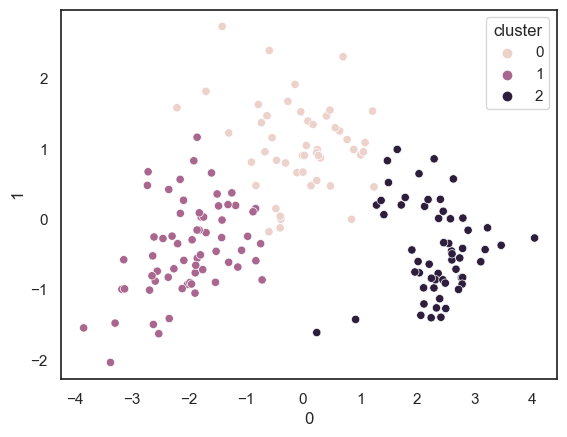

In [34]:
axs = plt.subplots()
axs = sns.scatterplot(0,1, hue='cluster',data=pca_df)

In [35]:
pd.crosstab(pca_df['cluster'],df['class'])

# 기존 class 0 -> cluster 1
# class 1 -> cluster 0
# class 2 -> cluster 2 

#예상보다 적절하게 나온 듯 합니다.

class,0,1,2
cluster,,,
0,1,45,0
1,54,7,0
2,2,14,41
